In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_treated.pkl'))

df = df.dropna()
df.head()

,ano,sigla_uf,escola_publica,id_aluno,situacao_censo,disciplina,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb,...,frequenta_festas_comunidade,gosta_estudar_disciplina,faz_licao_casa,correcao_licao_casa,utiliza_biblioteca_escola,rede,id_escola,serie,turno,desempenho_aluno_cat
27111,2015,PB,1,17523018,0,MT,-0.627672,0.648351,214.882332,36.237847,...,1.0,0.0,1.0,1.0,1.0,2,25083490,9,3,0
27112,2015,PB,1,17491737,0,LP,-1.027257,0.354996,193.389947,19.557923,...,2.0,1.0,2.0,2.0,2.0,2,61134907,9,1,0
27115,2015,PB,1,17491737,0,MT,-0.807123,0.639382,204.852398,35.736548,...,2.0,1.0,2.0,2.0,2.0,2,61134907,9,1,0
27122,2015,PB,1,17488937,0,LP,-0.341425,0.380753,231.174739,20.976963,...,1.0,1.0,2.0,2.0,1.0,2,25027573,9,1,1
27123,2015,PB,1,17488937,0,MT,-0.906444,0.545208,199.301116,30.472944,...,1.0,1.0,2.0,2.0,1.0,2,25027573,9,1,0


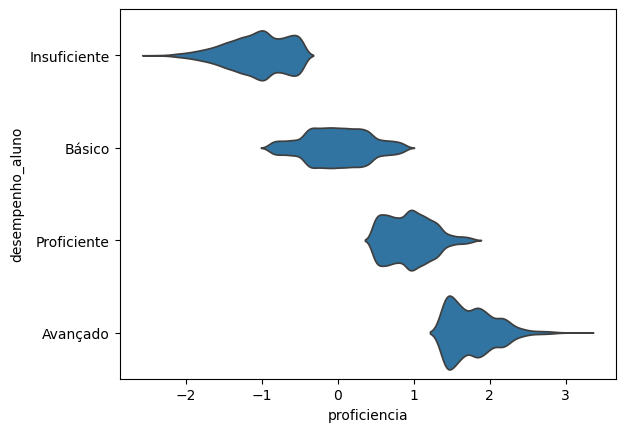

In [44]:
# analisando proficiencia e desempenho (descobrir em que categorias estão cada nível de proficiencia)
ordem = ['Insuficiente', 'Básico', 'Proficiente', 'Avançado']

sns.violinplot(x='proficiencia', y='desempenho_aluno', data=df, inner=None, order=ordem)
plt.show()

In [45]:
df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,desempenho_aluno_cat
count,50356.000000,50356.000000
mean,-0.074268,0.968623
std,0.827571,0.738980
min,-2.458611,0.000000
25%,-0.660181,0.000000
50%,-0.082109,1.000000
75%,0.502889,1.000000
max,3.214629,3.000000


In [46]:
# remover outliers
from sklearn.covariance import EllipticEnvelope

X = df[['proficiencia', 'desempenho_aluno_cat']]

ee = EllipticEnvelope(contamination=0.01)

ee.fit(X)

outliers = ee.predict(X) == -1

_df = df[~outliers]
_df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,erro_padrao
count,49852.000000,49852.000000
mean,-0.070705,0.419073
std,0.824851,0.092134
min,-2.458611,0.256818
25%,-0.651143,0.346166
50%,-0.075380,0.400761
75%,0.506408,0.476063
max,2.987645,0.707185


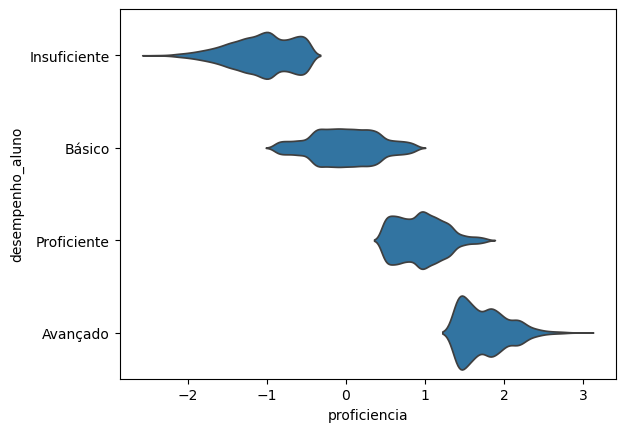

In [47]:
# analisando proficiencia e desempenho (descobrir em que categorias estão cada nível de proficiencia)
ordem = ['Insuficiente', 'Básico', 'Proficiente', 'Avançado']

sns.violinplot(x='proficiencia', y='desempenho_aluno', data=_df, inner=None, order=ordem)
plt.show()

In [6]:
# Droppando Avançado
_df = _df[_df['desempenho_aluno'] != 'Avançado']
_df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,desempenho_aluno_cat
count,48830.000000,48830.000000
mean,-0.125305,0.910055
std,0.769734,0.660295
min,-2.130618,0.000000
25%,-0.677232,0.000000
50%,-0.111509,1.000000
75%,0.448199,1.000000
max,1.787043,2.000000


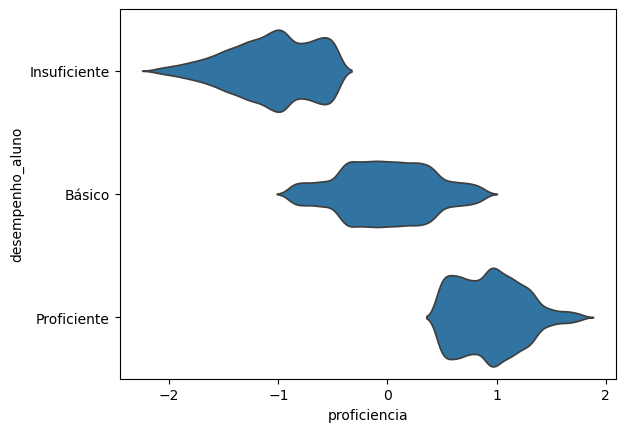

In [7]:
# analisando proficiencia e desempenho (descobrir em que categorias estão cada nível de proficiencia)
ordem = ['Insuficiente', 'Básico', 'Proficiente']

sns.violinplot(x='proficiencia', y='desempenho_aluno', data=_df, inner=None, order=ordem)
plt.show()

<AxesSubplot: xlabel='proficiencia', ylabel='Count'>

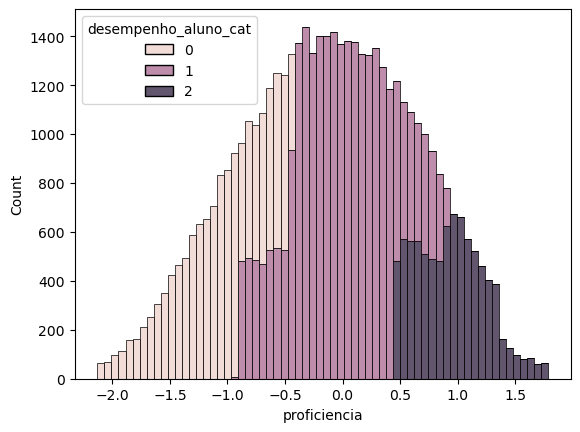

In [8]:
# histograma das proficiencias e desempenho

sns.histplot(data=_df, x='proficiencia', hue='desempenho_aluno_cat', multiple='stack')

<AxesSubplot: xlabel='proficiencia', ylabel='Count'>

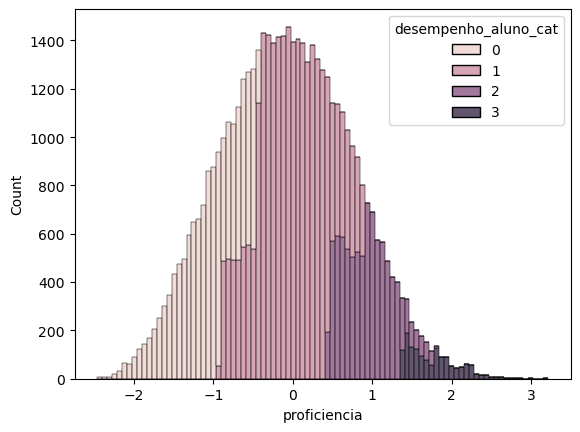

In [9]:
# desempenhos originais para comparação

sns.histplot(data=df, x='proficiencia', hue='desempenho_aluno_cat', multiple='stack')

Comparando erro padrão das classes

<AxesSubplot: xlabel='erro_padrao', ylabel='Count'>

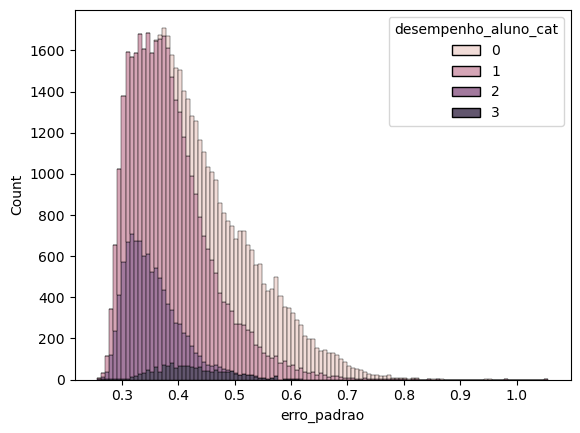

In [10]:
sns.histplot(data=df, x='erro_padrao', hue='desempenho_aluno_cat', multiple='stack')

<AxesSubplot: xlabel='erro_padrao', ylabel='Count'>

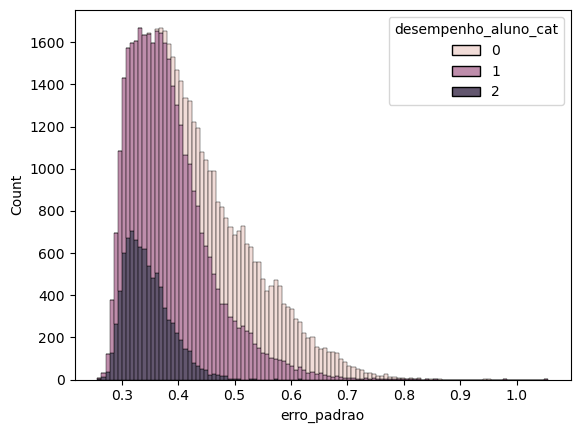

In [11]:
sns.histplot(data=_df, x='erro_padrao', hue='desempenho_aluno_cat', multiple='stack')

<AxesSubplot: xlabel='proficiencia', ylabel='erro_padrao'>

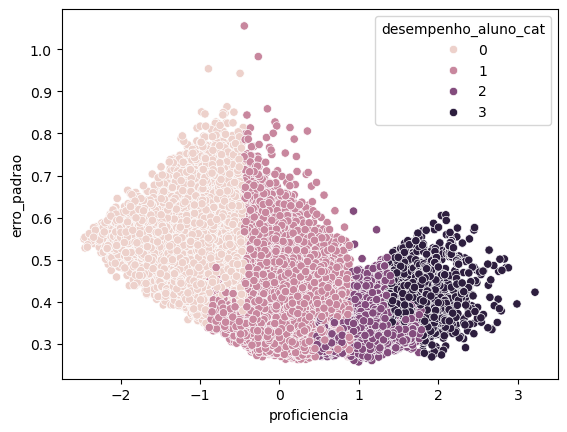

In [12]:
sns.scatterplot(data=df, x='proficiencia', y='erro_padrao', hue='desempenho_aluno_cat')

<AxesSubplot: xlabel='proficiencia', ylabel='erro_padrao'>

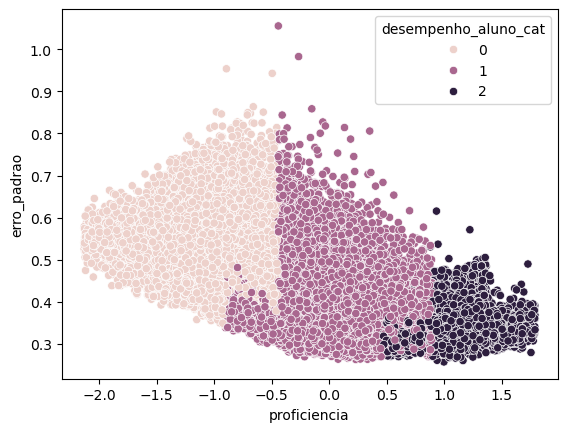

In [13]:
sns.scatterplot(data=_df, x='proficiencia', y='erro_padrao', hue='desempenho_aluno_cat')

Aplicando PCA para ver a relação entre as variáveis

In [14]:
# valores únicos das colunas
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno']

for col in _df.columns:
    if col not in exclude:
        print(col, _df[col].unique())

idade [18 17 16 15 14 13]
escolaridade_mae [4. 1. 0. 2. 3. 5.]
mae_sabe_ler_escrever [1 0]
mae_le [1. 0.]
escolaridade_pai [1. 3. 4. 2. 0. 5.]
pai_sabe_ler_escrever [1. 0.]
pai_le [1. 0.]
responsaveis_incentivam_realizacao_licao_casa [1. 0.]
responsaveis_incentivam_estudos [1. 0.]
responsaveis_incentivam_leitura [1. 0.]
responsaveis_incentivam_comparecer_aulas [1. 0.]
possui_computador [1. 0. 2. 3. 4.]
tempo_lazer [1. 4. 2. 3. 0.]
leitura_jornais [1. 0. 2.]
leitura_livros_geral [1. 2. 0.]
leitura_literatura_infantojuvenil [1. 2. 0.]
leitura_historia_quadrinhos [1. 2. 0.]
leitura_revista_comportamento [1. 2. 0.]
leitura_revistas_geral [1. 2. 0.]
leitura_internet [0. 1. 2.]
frequenta_biblioteca [1. 0. 2.]
frequenta_cinema [0. 2. 1.]
frequenta_espetaculo_exposicao [1. 2. 0.]
frequenta_festas_comunidade [1. 2. 0.]
gosta_estudar_disciplina [0. 1.]
faz_licao_casa [1. 2. 0.]
correcao_licao_casa [1. 2. 0.]
utiliza_biblioteca_escola [1. 2. 0.]
desempenho_aluno_cat [0 1 2]


<AxesSubplot: xlabel='pca1', ylabel='pca2'>

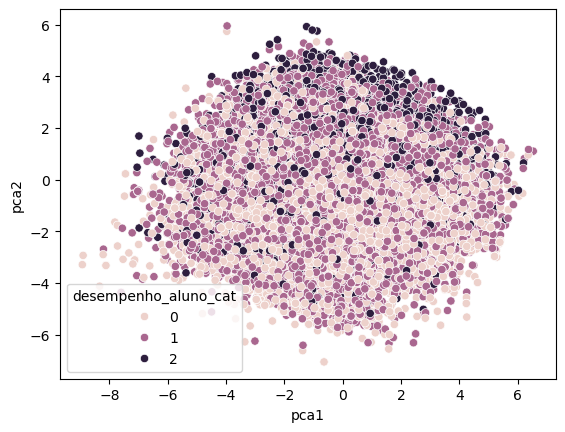

In [15]:
# aplicando PCA para redução de dimensionalidade

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = _df[[col for col in _df.columns if col not in exclude]]
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
X = pca.fit_transform(X)

_df.loc[:, 'pca1'] = X[:, 0]
_df.loc[:, 'pca2'] = X[:, 1]

sns.scatterplot(data=_df, x='pca1', y='pca2', hue='desempenho_aluno_cat')

<AxesSubplot: xlabel='pca1', ylabel='pca2'>

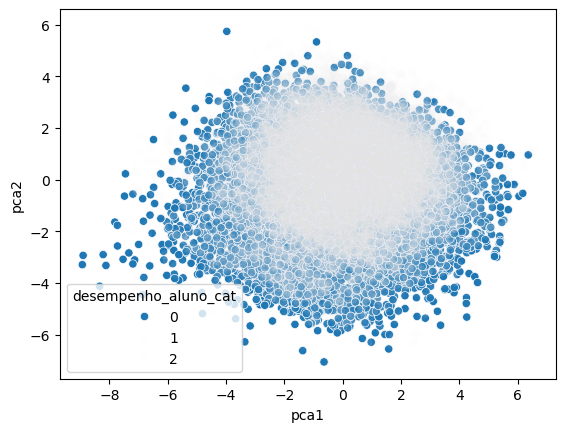

In [16]:
# applying hue only for class 0 
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 0], x='pca1', y='pca2', hue='desempenho_aluno_cat')
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 1], x='pca1', y='pca2', palette='light:b', hue='desempenho_aluno_cat', alpha=0.05)
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 2], x='pca1', y='pca2', palette='light:b', hue='desempenho_aluno_cat', alpha=0.05)

<AxesSubplot: xlabel='pca1', ylabel='pca2'>

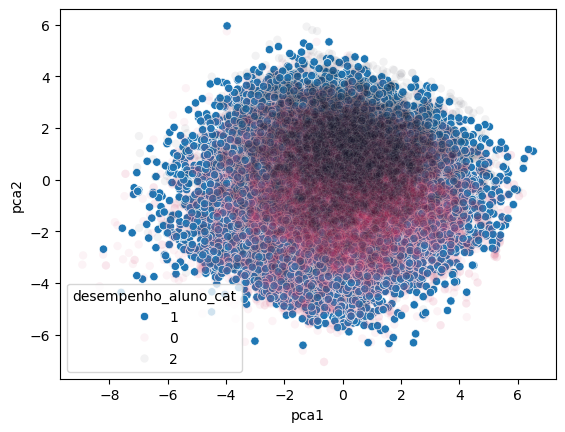

In [17]:
# applying hue only for class 1
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 1], x='pca1', y='pca2', hue='desempenho_aluno_cat')
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 0], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 2], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)

<AxesSubplot: xlabel='pca1', ylabel='pca2'>

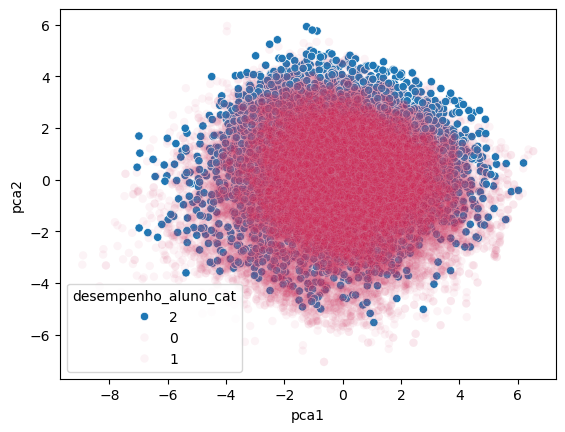

In [18]:
# applying hue only for class 2
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 2], x='pca1', y='pca2', hue='desempenho_aluno_cat', palette='tab10')
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 0], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 1], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)

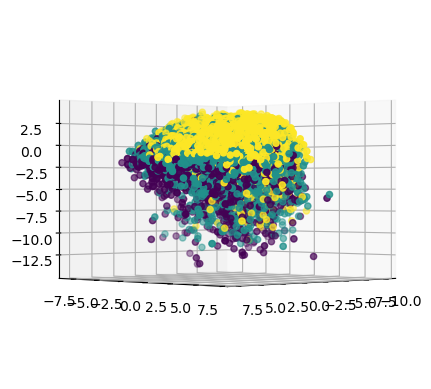

In [35]:
# PCA com 3 componentes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X = _df[[col for col in _df.columns if col not in exclude]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pca.fit_transform(X)

_df.loc[:, 'pca1'] = X[:, 0]
_df.loc[:, 'pca2'] = X[:, 1]
_df.loc[:, 'pca3'] = X[:, 2]

# plottando em 3 dimensões
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Corrigindo a chamada para ax.scatter
ax.scatter(_df['pca1'], _df['pca2'], _df['pca3'], c=_df['desempenho_aluno_cat'])

ax.view_init(elev=0, azim=45)

plt.show()

In [38]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supondo que _df já esteja carregado e exclude esteja definido
X = _df[[col for col in _df.columns if col not in exclude]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

_df['pca1'] = X_pca[:, 0]
_df['pca2'] = X_pca[:, 1]
_df['pca3'] = X_pca[:, 2]

# Criando o gráfico interativo com Plotly
fig = px.scatter_3d(
    _df, 
    x='pca1', 
    y='pca2', 
    z='pca3', 
    color='desempenho_aluno_cat',
    title='PCA 3D Scatter Plot'
)

# Salvar o gráfico como um arquivo HTML
fig.write_html('pca_3d_scatter_plot.html')

# Para visualizar o gráfico no navegador
import webbrowser
webbrowser.open('pca_3d_scatter_plot.html')

True

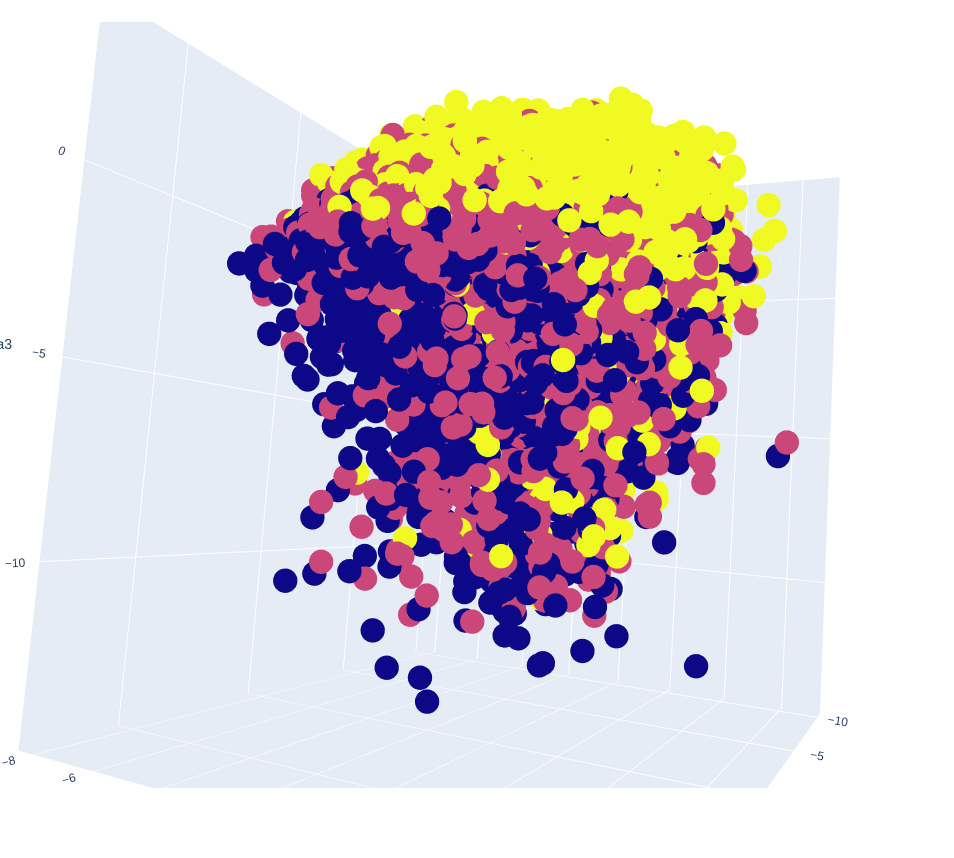

In [71]:
save = False

_new_df = _new_df.drop(columns=['pca1', 'pca2', 'cluster'])
new_df = new_df.drop(columns=['pca1', 'pca2', 'cluster'])
if save:
    _new_df.to_pickle(os.path.join(DATA_FOLDER, 'saeb_treated_3-NO.pkl'))
    new_df.to_pickle(os.path.join(DATA_FOLDER, 'saeb_treated_NO.pkl'))